In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  r2_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor


# Identify features

In [2]:
data = pd.read_csv('Data/historic.csv')

/Users/calumthompson/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (49,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data['min_bins'] = pd.cut(data['minutes'], 4, labels = False)

data.groupby(['min_bins'])['total_points'].mean()

min_bins
0.0    0.127184
1.0    1.402167
2.0    2.285841
3.0    3.524284
Name: total_points, dtype: float64

In [4]:
np.abs(data.corr()['min_bins']).sort_values(ascending = False).head(30)

min_bins                           1.000000
minutes                            0.993443
attempted_passes                   0.835219
recoveries                         0.804770
completed_passes                   0.779631
bps                                0.753282
L4W_minutes                        0.724961
LW_minutes                         0.723348
influence                          0.696423
ict_index                          0.678958
TSS_minutes                        0.670247
L4W_bps                            0.665961
L4W_influence                      0.643025
TSS_bps                            0.631946
total_points                       0.629727
goals_conceded                     0.616795
TSS_influence                      0.616129
clearances_blocks_interceptions    0.615817
L4W_total_points                   0.606568
TSS_total_points                   0.587251
LW_bps                             0.578799
L4W_ict_index                      0.573016
LW_influence                    

# Prep data

In [5]:
def encode(df):

    for col in df.select_dtypes(exclude = 'number').columns:

        print("Encoding ", col)

        lb_make = LabelEncoder()
        df[col +'_encoded'] = lb_make.fit_transform(df[col].astype(str))
        
        df = df.drop(columns = col)
        
    return df

In [6]:
model_columns = ['name',
                 'position',
                 'FIX_Team',
                 'FIX_Opponent',
                 'FIX_Home?', 
                 'FIX_GW', 
                 'FIX_season',
                 'minutes',
                 'INCOMING_team_goals',
                 'INCOMING_opponent_goals',
                 'INCOMING_team_points',
                 'INCOMING_opponent_points',
                 'FIX_points_diff',
                 'FIX_goals_diff',
                 'L4W_total_points',
                 'TSS_total_points',
                 'L4W_goals_scored',
                 'TSS_goals_scored',
                 'L4W_minutes',
                 'TSS_minutes',
                 'cost_today',
                 'value',
                 'L4W_bps',
                 'TSS_bps',
                 'L4W_ict_index',
                 'TSS_ict_index',
                 'L4W_influence',
                 'TSS_influence',
                 'L4W_creativity',
                 'TSS_creativity',
                 'L4W_threat',
                 'TSS_threat',
                 'L4W_clean_sheets',
                 'TSS_clean_sheets'#,
#                  'min_bins'
                 ]

print(len(model_columns), 'features')

34 features


In [7]:
model_df = encode(data[model_columns].dropna())

Encoding  name
Encoding  FIX_Team
Encoding  FIX_Opponent
Encoding  FIX_season


In [8]:
train_df, test_df = train_test_split(model_df, test_size=0.33, random_state=69)

In [9]:
y_col = 'minutes'
x_cols = model_df.columns.values[model_df.columns.values != y_col]

In [10]:
X_train = train_df[x_cols]
y_train = train_df[y_col]

In [11]:
X_test = test_df[x_cols]
y_test = test_df[y_col]

In [12]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Execute

In [13]:
def plot_results(y_actual,y_predicted, plot_linear_reference = False):
    
    
    y_predicted = y_predicted.reshape(-1,1)
    y_actual = y_actual.reshape(-1,1)
    
    plt.scatter(y_predicted,y_actual, marker = 'x', alpha = 0.5)
    
    plt.grid()
    plt.xlim(left = 0)
    plt.ylim(bottom = 0)
    
    plt.xlabel('y_predicted')
    plt.ylabel('y_actual')
    
    r2 = r2_score(y_predicted,y_actual)
    
    plt.title("R2: " + str(r2))
    
    if plot_linear_reference:
        
        # Prediction = fit line 
        ref = np.arange(0,140,0.1)
        plt.plot(ref,ref, linestyle = '--' , c = 'k', label = 'Fit = prediction')

        # Show actual LoBF
        Regressor = LinearRegression()
        Regressor.fit(y_predicted,y_actual)
        LOBF = Regressor.predict(y_predicted)
        plt.plot(y_predicted,LOBF,linestyle = '-' , c = 'k', label = 'LoBF')
        
        plt.legend()
        
    
    plt.show()
    
#     print("R2: ", r2_score(y_test, fit))

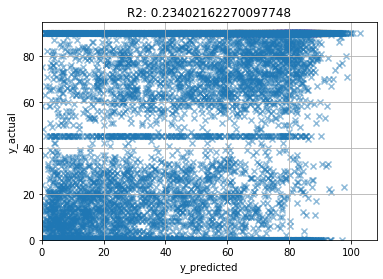

/Users/calumthompson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/calumthompson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/calumthompson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [14]:
mlp = MLPRegressor(max_iter = 1000
                  ,hidden_layer_sizes = (20, 20,  20, 20 , 20)
                  ,activation = 'identity')


mlp.fit(X_train,y_train)
fit = mlp.predict(X_test)

plot_results(y_test.values,fit)

test_df['prediction'] = fit
test_df['test/train'] = 'test'

train_df['prediction'] = mlp.predict(X_train)
train_df['test/train'] = 'train'